In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv(
    "./data/ml-25m/ratings.csv"
)

In [3]:
df.head(2)

,userId,movieId,rating,timestamp
0,1,296,5.0,1147880044
1,1,306,3.5,1147868817


In [4]:
df["pdate"] = pd.to_datetime(df["timestamp"], unit='s')

In [5]:
df.head(5)

,userId,movieId,rating,timestamp,pdate
0,1,296,5.0,1147880044,2006-05-17 15:34:04
1,1,306,3.5,1147868817,2006-05-17 12:26:57
2,1,307,5.0,1147868828,2006-05-17 12:27:08
3,1,665,5.0,1147878820,2006-05-17 15:13:40
4,1,899,3.5,1147868510,2006-05-17 12:21:50


In [6]:
df.dtypes

userId                int64
movieId               int64
rating              float64
timestamp             int64
pdate        datetime64[ns]
dtype: object

In [7]:
df.describe()

,userId,movieId,rating,timestamp
count,2.500010e+07,2.500010e+07,2.500010e+07,2.500010e+07
mean,8.118928e+04,2.138798e+04,3.533854e+00,1.215601e+09
std,4.679172e+04,3.919886e+04,1.060744e+00,2.268758e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,4.051000e+04,1.196000e+03,3.000000e+00,1.011747e+09
50%,8.091400e+04,2.947000e+03,3.500000e+00,1.198868e+09
75%,1.215570e+05,8.623000e+03,4.000000e+00,1.447205e+09
max,1.625410e+05,2.091710e+05,5.000000e+00,1.574328e+09


In [8]:
df_group = df.groupby([df["pdate"].dt.month, "rating"])[r"userId"].agg(pv=np.sum)

In [9]:
df_group.head(10)

pv
pdate rating             
1     0.5      2741195143
      1.0      5622933551
      1.5      2940577036
      2.0     11829653057
      2.5      9271608025
      3.0     33824774134
      3.5     23149353434
      4.0     47701066179
      4.5     16332067722
      5.0     25180020861

In [10]:
df_stack = df_group.unstack()
df_stack

pv                                                   \
rating         0.5         1.0         1.5          2.0         2.5   
pdate                                                                 
1       2741195143  5622933551  2940577036  11829653057  9271608025   
2       2543111931  4227803164  2458698188   9382224637  8007784600   
3       3457910459  5267709061  3182302305  11148330322  9897989055   
4       2453814450  4710615357  2696153453  10215633650  8160901179   
5       2615830494  4640051202  2694821912   9953802508  8826016917   
6       2710432695  4814549150  2626809018  10104528727  8042765744   
7       2670296107  5305122712  2700179980  11414620965  8529865789   
8       2493951669  5422736062  2647462655  11801921205  8533096552   
9       2448925832  4196875817  2475443281   9267040400  8252121154   
10      2495050990  5311192032  2612668304  11486947913  8180336882   
11      2574476717  6863694275  2677417208  13972123331  8487362147   
12      2428943447  6493095778  2481191435  12949411558  7905278207   

                                                                         
rating          3.0          3.5          4.0          4.5          5.0  
pdate                                                                    
1       33824774134  23149353434  47701066179  16332067722  25180020861  
2       26949089620  20469299066  39235667142  14324786978  20540209154  
3       32422865682  24530014205  44757686094  16073560028  22975214260  
4       29180029068  20384960988  41366088509  14198752088  22880738294  
5       32834592585  22470561977  41855600702  15246371096  22476203167  
6       33900957105  20372910024  42145612325  13827360707  22307295061  
7       35748926363  21845778025  47106609502  15487204436  25222142220  
8       35016650868  21023579891  45030234020  14439532610  24184074683  
9       28048723751  20760412196  38071977942  14497786964  20305171012  
10      33655289961  20834799338  47211267860  15136046163  26874447091  
11      39842296290  21648766306  55289708743  15789375480  32138628279  
12      36746235668  19655297143  49874836241  13503144342  28511682790

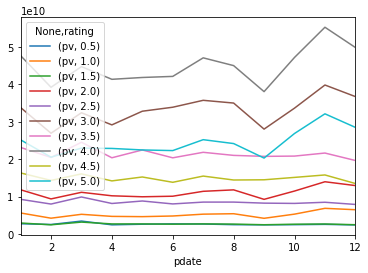

In [11]:
df_stack.plot()

In [12]:
df_stack.stack().head(10)

pv
pdate rating             
1     0.5      2741195143
      1.0      5622933551
      1.5      2940577036
      2.0     11829653057
      2.5      9271608025
      3.0     33824774134
      3.5     23149353434
      4.0     47701066179
      4.5     16332067722
      5.0     25180020861

In [13]:
df_group.head(10)

pv
pdate rating             
1     0.5      2741195143
      1.0      5622933551
      1.5      2940577036
      2.0     11829653057
      2.5      9271608025
      3.0     33824774134
      3.5     23149353434
      4.0     47701066179
      4.5     16332067722
      5.0     25180020861

In [14]:
df_reset = df_group.reset_index()

In [15]:
df_pivot = df_reset.pivot("pdate", "rating", "pv")

In [16]:
df_pivot.head()

rating,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0
pdate,,,,,,,,,,
1,2741195143,5622933551,2940577036,11829653057,9271608025,33824774134,23149353434,47701066179,16332067722,25180020861
2,2543111931,4227803164,2458698188,9382224637,8007784600,26949089620,20469299066,39235667142,14324786978,20540209154
3,3457910459,5267709061,3182302305,11148330322,9897989055,32422865682,24530014205,44757686094,16073560028,22975214260
4,2453814450,4710615357,2696153453,10215633650,8160901179,29180029068,20384960988,41366088509,14198752088,22880738294
5,2615830494,4640051202,2694821912,9953802508,8826016917,32834592585,22470561977,41855600702,15246371096,22476203167


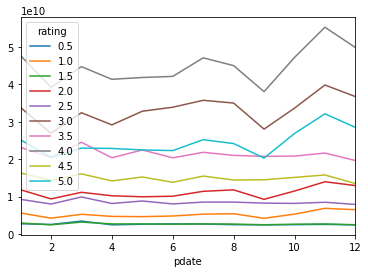

In [18]:
df_pivot.plot()